# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
import pandas as pd# importar librerías
import numpy as np
from IPython.display import HTML
from matplotlib import pyplot as plt


In [2]:
# leer conjuntos de datos en los DataFrames
#pd.read_csv("/datasets/instacart_orders.csv") #Usamos esta linea para imprimir temporalmente un archivo y 
#Notar que el separador necesario es ";"
df_orders=pd.read_csv("./datasets/instacart_orders.csv", sep=";")
df_products=pd.read_csv("./datasets/products.csv", sep=";")            
df_aisles=pd.read_csv("./datasets/aisles.csv", sep=";")
df_departments=pd.read_csv("./datasets/departments.csv", sep=";")
df_order_products=pd.read_csv("./datasets/order_products.csv", sep=";")

In [3]:
df_orders.info()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


Notamos datos faltantes en "5:days_since_prior_order" columna que es "float" a comparación de las demas que son int

In [4]:
# mostrar información del DataFrame
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Notamos datos faltantes en product_name, fila que es "object" es decir cadenas o incluso combinación de datos, aunque probablemente solo sean cadenas. las demas columnas contienen enteros (in)

In [5]:
# mostrar información del DataFrame
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


una columna de enteros y una de cadenas, no hay datos nulos

In [6]:
# mostrar información del DataFrame
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


una columna de enteros y una de cadenas, no hay datos nulos

In [7]:
# mostrar información del DataFrame
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


hay datos nulos en la columna 2:add_to_cart_order, fila que es float, las demas son int

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Notamos que los archivos csv estan divididos por ";".

El dataframe de ordenes tiene 28819 datos nulos unicamente en una columna, probablemente sea posible recuprecuperar varios de ellos.

el dataframe de productos tiene 1258 nombres de productos vacios, el nombre en si no se podra recuperar, tal vez se pueda etiquetar con base al pasillo de pertenencia.

los dataframes de pasillos y departamentos se encuentran integros, esto puede servir para completar información de otros dataframes.

el dataframe de ordenes de productos tiene unicamente menos de mil datos nulos, una cantidad despeciable a comparacion del tamaño del dataframe, es posible descartar estos datos sin consecuencias significativas.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

1. imprimir una muestra aleatoria del primer dataframe
2. revisar los tipos de datos, id enteros, cantidades como floats, etc.
3. realizar las conversiones necesarias de a cuerdo al punto 2
4. convertimos cadenas a minusculas y eliminamos espacios
5. Buscamos duplicados
6. eliminamos duplicados
7. repetimos para los demas dataframes
8. buscamos datos nulos, faltantes o indefinidos
9. buscamos rellenar nulos por el contexto del dataframe
10. eliminamos aquellos datos nulos que no se puedan averiguar de alguna forma.
11. repetimos para el resto de los dataframes.


## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
display(df_orders[df_orders["order_id"].duplicated()])
display(HTML('<hr>'))
print("la cantidad de pedidos duplicados es:" ,df_orders["order_id"].duplicated().sum())

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


la cantidad de pedidos duplicados es: 15


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Si hay lineas duplicadas, todas ocurren en el dia miercoles (3), miercoles, a las 2pm

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
display(df_orders[(df_orders["order_dow"]==3) & (df_orders["order_hour_of_day"]==2)])


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado?

por la naturaleza de las entradas no es posible tener mas duplicados causados por mayusculas y minusculas.
tambien teniendo 15 filas duplicadas a lo largo de 121 entradas es poco significativo el eliminarlas

In [10]:
# Elimina los pedidos duplicados 

df_orders.drop_duplicates(inplace=True)

In [11]:
# Vuelve a verificar si hay filas duplicadas
print("La cantidad actual de duplicados es:",df_orders.duplicated().sum())

La cantidad actual de duplicados es: 0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos

print("La cantidad actual de <<IDs>> duplicados es:",df_orders["order_id"].duplicated().sum())

La cantidad actual de <<IDs>> duplicados es: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos


habian 15 pedidos duplicados con fecha miercoles a las 2pm.
Se logró borrar todos los duplicados.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
df_products["product_name"]=df_products["product_name"].str.upper()
print("Existen ",df_products.duplicated().sum(), " filas duplicadas")


df_products[df_products.duplicated()]



Existen  0  filas duplicadas


,product_id,product_name,aisle_id,department_id


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
print("Existen ",df_products["department_id"].duplicated().sum(), " ids de departamentos duplicados")


df_products[df_products["department_id"].duplicated()]


Existen  49673  ids de departamentos duplicados


,product_id,product_name,aisle_id,department_id
4,5,GREEN CHILE ANYTIME SAUCE,5,13
6,7,PURE COCONUT WATER WITH ORANGE,98,7
7,8,CUT RUSSET POTATOES STEAM N' MASH,116,1
9,10,SPARKLING ORANGE JUICE & PRICKLY PEAR BEVERAGE,115,7
10,11,PEACH MANGO JUICE,31,7
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

product_duplicated=df_products["product_name"].str.upper().duplicated()

print(df_products["product_name"].str.upper().value_counts(dropna=False))
print("---------------------------------------------")
print("Existen ",product_duplicated.sum(), " nombres de productos duplicados")


df_products[product_duplicated]

product_name
NaN                                                                     1258
GREEN TEA WITH GINSENG AND HONEY                                           3
CARROT AND CELERY STICKS                                                   2
APRICOT ENERGY BAR                                                         2
PROACTIVE HEALTH INDOOR WEIGHT & HAIRBALL CARE WITH CHICKEN CAT FOOD       2
                                                                        ... 
ALL NATURAL CHICKEN APPLE SAUSAGE                                          1
QUARTERED ARTICHOKE HEARTS                                                 1
BIG EYE IPA                                                                1
UNSTOPABLES LUSH                                                           1
FRESH FOAMING CLEANSER                                                     1
Name: count, Length: 48333, dtype: int64
---------------------------------------------
Existen  1361  nombres de productos duplicados


,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes

product_duplicated_drop=df_products[~df_products["product_name"].isna()]

#print(product_duplicated_drop) print para asegurar el filtrado correcto
print("Existen ",product_duplicated_drop.duplicated().sum(), " nombres de productos duplicados")

print(df_products[(df_products["aisle_id"]==100) & 
                  (df_products["department_id"]==21)][["aisle_id","department_id"]].value_counts()
     )

Existen  0  nombres de productos duplicados
aisle_id  department_id
100       21               1258
Name: count, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

- Inicie poniendo todos los nombres en mayusculas, para tener uniformidad.

- Noté que se repiten los departamentos, esto es por que diferentes productos comparten departamento y pasillo.
- Por otro lado se ve que el dataframe poseia duplicados en los nombres de producto, una inspección mas cercana revelo que todos los duplicados eran nombres nulos con el mismo pasillo (100) y departamento (21), implicando que es un registro nulo y no uno duplicado, por lo que se tratará mas adelante.

### `Departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
df_departments["department"]=df_departments["department"].str.lower()

print("Existen ",df_departments.duplicated().sum(), " filas duplicadas")


#df_departments[df_departments.duplicated()] #Como no hay filas duplicadas, no hay necesidad de mostrar el DF

Existen  0  filas duplicadas


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos #Supongo aqui se refiere a ids de departamentos, el DF no contiene productos
print("Existen ",df_departments["department_id"].duplicated().sum(), " ids de departamento duplicados")
print("Existen ",df_departments["department"].str.lower().duplicated().sum(), "nombres de departamento duplicados")

Existen  0  ids de departamento duplicados
Existen  0 nombres de departamento duplicados


Describe brevemente tus hallazgos y lo que hiciste con ellos.

- El Dataframe ya viene en buena calidad, sin datos nulos ni duplicados, unicamente se aseguro la uniformidad de los nombres de departamentos al imponer minusculas.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
df_aisles["aisle"]=df_aisles["aisle"].str.lower()

print("Existen ",df_aisles.duplicated().sum(), " filas duplicadas")


#df_aisles[df_aisles.duplicated()]

Existen  0  filas duplicadas


In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
print("Existen ",df_aisles["aisle_id"].duplicated().sum(), " ids de pasillos duplicados")
print("Existen ",df_aisles["aisle"].str.lower().duplicated().sum(), "nombres de pasillos duplicados")

Existen  0  ids de pasillos duplicados
Existen  0 nombres de pasillos duplicados


Describe brevemente tus hallazgos y lo que hiciste con ellos.

- El dataframe esta en buen estado, sin filas, nombres ó IDs repetidos.  unicamente se aseguro la uniformidad de los nombres de pasillos al imponer minusculas.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas

print("Existen ",df_order_products.duplicated().sum(), " filas duplicadas")


#df_order_products[df_order_products.duplicated()]
df_order_products

Existen  0  filas duplicadas


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print("Existen ",df_order_products["order_id"].duplicated().sum(), " ids de orden duplicadas")
print("Existen ",df_order_products["product_id"].duplicated().sum(), " ids de producto duplicados")


df_order_products[df_order_products["add_to_cart_order"].isna()][["order_id","product_id"]].value_counts()




Existen  4094961  ids de orden duplicadas
Existen  4499434  ids de producto duplicados


order_id  product_id
9310      25753         1
1959075   7485          1
          45842         1
          47740         1
1961723   3849          1
                       ..
936852    11193         1
          14833         1
          15438         1
          18362         1
3383594   49144         1
Name: count, Length: 836, dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

- Por la naturaleza del dataframe, es normal que las entradas: id de producto, de orden, el orden con el que los productos se agregan y el conteo de "se ha vuelto a ordenar" se repitan, ya que no hay filas que se repitan del todo no se elimino ninguna entrada.
- Tambien se notó que los datos nulos en "add_to_cart_order" no repiten datos en las demas entradas, por lo que se deben tratar como datos nulos y no como entradas repetidas.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
print(df_products[df_products["product_name"].isna()])


       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

Los valores nulos parecen tener ids de producto diferentes, pero todos referidos al mismo pasillo y departamento.

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

print(df_products[(df_products["aisle_id"]==100) ][["aisle_id","department_id"]].value_counts()
     )

aisle_id  department_id
100       21               1258
Name: count, dtype: int64


Describe brevemente cuáles son tus hallazgos.


- si, como se comento al encontrar el dato duplicado los 1258 datos con pasillo 100 y departamento 21 son NAN

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?

print(df_products[(df_products["department_id"]==21)][["aisle_id","department_id"]].value_counts()
     )

aisle_id  department_id
100       21               1258
Name: count, dtype: int64


Describe brevemente cuáles son tus hallazgos.


- La combinación de pasillo 100 y departamento 21 parece ser un default para productos desconocidos.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(df_products[(df_products["aisle_id"]==100) & 
                  (df_products["department_id"]==21)][["aisle_id","department_id"]]
     )
print("------------------------------------------------")
print(df_products[(df_products["aisle_id"]==100) & 
                  (df_products["department_id"]==21)][["product_id","aisle_id","department_id"]].value_counts()
     )

       aisle_id  department_id
37          100             21
71          100             21
109         100             21
296         100             21
416         100             21
...         ...            ...
49552       100             21
49574       100             21
49640       100             21
49663       100             21
49668       100             21

[1258 rows x 2 columns]
------------------------------------------------
product_id  aisle_id  department_id
38          100       21               1
33668       100       21               1
33935       100       21               1
33904       100       21               1
33896       100       21               1
                                      ..
16336       100       21               1
16330       100       21               1
16286       100       21               1
16273       100       21               1
49669       100       21               1
Name: count, Length: 1258, dtype: int64


Describe brevemente cuáles son tus hallazgos.


- Todos los nombres nulos poseen un id de producto diferente, pero todos refieren al mismo departamento y pasillo.
- Pareciera que al no asignaro correctamente un nombre, se tomaran valores de departamento y pasillo por defecto.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'

df_products["product_name"]=df_products["product_name"].replace(np.nan, "unknown")
print(df_products[(df_products["aisle_id"]==100) & 
                  (df_products["department_id"]==21)][["department_id","aisle_id","product_name"]].value_counts()
     )

department_id  aisle_id  product_name
21             100       unknown         1258
Name: count, dtype: int64


In [28]:
#Revisaremos con mas detenimiento el pasillo y departamento.
print(df_aisles[df_aisles["aisle_id"]==100])
print(df_departments[df_departments["department_id"]==21])

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


Describe brevemente tus hallazgos y lo que hiciste con ellos.


- Encontramos los datos nulos en la columna de nombre de producto, notamos que todos estos valores nulos tenian el mismo departamento y el mismo pasillo, pero ids de producto diferentes. 
- Una inspección al pasillo y departamento revela que son categorias para productos faltantes.
- Tratamos los datos cambiando dichos datos nulos a "unknown".


### `orders` data frame

In [29]:
# Encuentra los valores ausentes
print(df_orders[df_orders["days_since_prior_order"].isna()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

In [30]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(df_orders[df_orders["days_since_prior_order"].isna()].groupby("order_number")["order_number"].count())
#print(df_orders[df_orders["days_since_prior_order"].isna()]["order_number"].value_counts(dropna=False)) #Forma alternativa

df_orders["days_since_prior_order"]=df_orders["days_since_prior_order"].replace(np.nan,-1)

order_number
1    28817
Name: order_number, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

- Todos los valores nulos vienen de primeros pedidos, por lo que cambie los datos nulos a -1.

### `order_products` data frame

In [31]:
# Encuentra los valores ausentes
order_pro_nan=df_order_products["add_to_cart_order"].isna()
print(df_order_products[order_pro_nan])



         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [32]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print('valor maximo de la columna "add_to_cart_order":',df_order_products["add_to_cart_order"].max())
print('valor minimo de la columna "add_to_cart_order":',df_order_products["add_to_cart_order"].min())


valor maximo de la columna "add_to_cart_order": 64.0
valor minimo de la columna "add_to_cart_order": 1.0


Describe brevemente cuáles son tus hallazgos.

La columna contiene valores hasta "64" sin razon aparente.




In [33]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
ID_con_nan=df_order_products[order_pro_nan]["order_id"]
print(ID_con_nan)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [34]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos? 
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
group=df_order_products[order_pro_nan].groupby("order_id")
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
DF1=df_order_products[~df_order_products["add_to_cart_order"].isna() & df_order_products["order_id"].isin(ID_con_nan)]
print("La cantidad de items correctamente registrados por orden es: \n", DF1["order_id"].value_counts())
print("--------------------------------------------")
print("El registro minimo de items en un pedido que tiene un dato nulo es: ", DF1["order_id"].value_counts().min())

print("--------------------------------------------")
DF2=df_order_products[df_order_products["add_to_cart_order"].isna()]

print("La cantidad de registros nulos en cada orden es: \n",DF2["order_id"].value_counts())


#df_order_products[df_order_products["order_id"]==9310].count()

La cantidad de items correctamente registrados por orden es: 
 order_id
2094761    64
1598369    64
1959075    64
1968313    64
733526     64
           ..
1800005    64
1713430    64
1564093    64
1220886    64
844733     64
Name: count, Length: 70, dtype: int64
--------------------------------------------
El registro minimo de items en un pedido que tiene un dato nulo es:  64
--------------------------------------------
La cantidad de registros nulos en cada orden es: 
 order_id
61355      63
3308010    51
2136777    44
171934     40
1959075    34
           ..
888470      1
2621907     1
2729254     1
9310        1
2170451     1
Name: count, Length: 70, dtype: int64


Describe brevemente cuáles son tus hallazgos.

- Solo las ordenes con mas de 64 items tienen registros nulos, esto parece indicar que a partir del sexagesimo quinto item agregado a una orden, el registro se hace como un valor nulo. Por lo tanto tenemos ordenes de hasta 127 items.

In [35]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products=df_order_products.fillna({"add_to_cart_order":999})

df_order_products.astype({'add_to_cart_order': 'int'})

#print(df_order_products)
print("El numero de valores nulos ahora es: ",df_order_products["add_to_cart_order"].isna().sum())

El numero de valores nulos ahora es:  0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

- Pareciera que los valores nulos de "add_to_cart_order" son valores superiores a 64, como si originalmente el registro  se compusiera de 6 bits, por lo que todo valor superior no pudiera ser almacenado. 
- Como no podemos rescatar el orden en el que los items fueron agregados se re etiquetaron con el valor "999", asignandolos como los "ultimos en ser agregados" pero evitando eliminarlos de los dataframes.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


- La empresa debe buscar darle uniformidad a los nombres de productos, departamentos y pasillos; decidir entre mayusculas o minusculas.

- Se debe mejorar el sistema de adquisicion de registros en horas pico, es decir los miercoles a las 2pm.
- La información de la empresa de pasillos y departamentos esta bien estructurada.
- Se debe verificar el inventario de productos, para evitar tener productos sin nombre en los registros.
- Se debe automatizar que los primeros pedidos no generen un dato nulo en la entrada "days_since_prior_order".
- Se debe aumentar el tamaño del registro "add_to_cart_order" para que pueda almacenara numeros mayores a 64, se recomienda ampliar a 8 bits para almacenar hasta 256 entradas.






# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera a hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [36]:
#No reconozco el termino "sensibles" para los datos, empezare mostrando que son razonables
df_orders['order_hour_of_day'].describe()

count    478952.000000
mean         13.447034
std           4.224567
min           0.000000
25%          10.000000
50%          13.000000
75%          16.000000
max          23.000000
Name: order_hour_of_day, dtype: float64

In [37]:
df_orders['order_dow'].describe()

count    478952.000000
mean          2.775051
std           2.045901
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: order_dow, dtype: float64

Escribe aquí tus conclusiones

- Ambas entradas estan en un rango razonable, donde 0=domingo y 6=sabado

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_id, dtype: int64


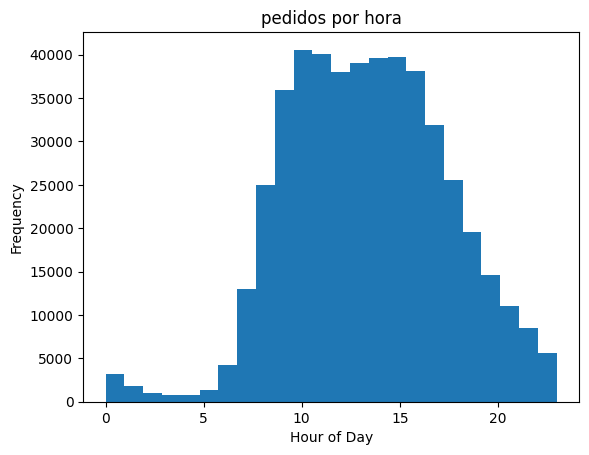

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_id, dtype: int64


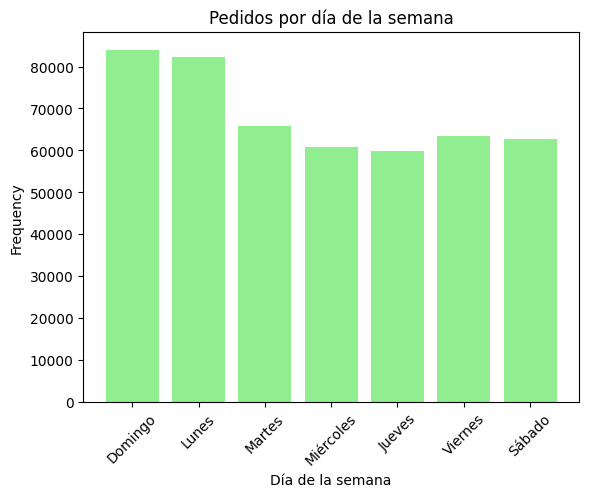

In [38]:
print(df_orders.groupby("order_hour_of_day")["order_id"].count())

df_orders["order_hour_of_day"].plot( # escribe tu código aquí
    kind="hist",
    bins=24,
    title="pedidos por hora",
    ylabel="Frequency",
    xlabel="Hour of Day"
)
plt.show()
print(df_orders.groupby("order_dow")["order_id"].count())

dias_semana = {0: 'Domingo', 1: 'Lunes', 2: 'Martes', 3: 'Miércoles', 4: 'Jueves', 5: 'Viernes', 6: 'Sábado'}
order_day = df_orders['order_dow'].value_counts().sort_index()
plt.bar([dias_semana[x] for x in order_day.index], order_day.values, color='lightgreen')
plt.title("Pedidos por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  
plt.show()

Escribe aquí tus conclusiones

- Podemos ver dos claros picos para las horas del desayuno y la comida, alrededor de las 10am  y 3pm.

### [A3] ¿Qué día de la semana compran víveres las personas?

Escribe aquí tus conclusiones

- La gente compra viveres todos los dias de forma significativa, pero especialmente los domingos y lunes.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

days_since_prior_order
-1.0     28817
 0.0      9589
 1.0     20179
 2.0     27138
 3.0     30224
 4.0     31006
 5.0     30096
 6.0     33930
 7.0     44577
 8.0     25361
 9.0     16753
 10.0    13309
 11.0    11467
 12.0    10658
 13.0    11737
 14.0    13992
 15.0     9416
 16.0     6587
 17.0     5498
 18.0     4971
 19.0     4939
 20.0     5302
 21.0     6448
 22.0     4514
 23.0     3337
 24.0     3015
 25.0     2711
 26.0     2640
 27.0     2986
 28.0     3745
 29.0     2673
 30.0    51337
Name: order_id, dtype: int64
count    478952.000000
mean         10.373687
std           9.362489
min          -1.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64


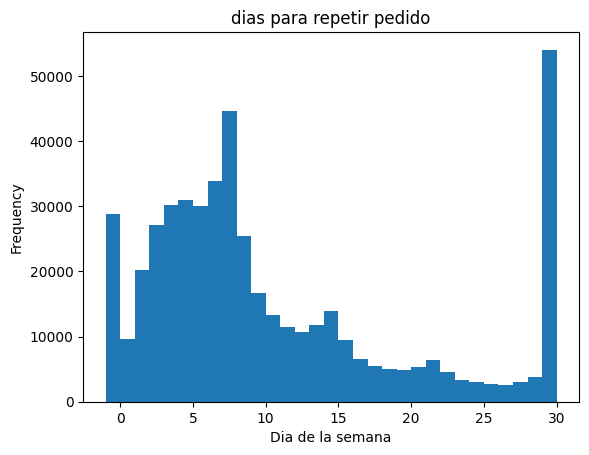

In [39]:
print(df_orders.groupby("days_since_prior_order")["order_id"].count())
print(df_orders["days_since_prior_order"].describe())
df_orders["days_since_prior_order"].plot( # escribe tu código aquí
    kind="hist",
    bins=31,
    title="dias para repetir pedido",
    ylabel="Frequency",
    xlabel="Dia de la semana"
)
plt.show()

Escribe aquí tus conclusiones


Tenemos que resaltar dos eventos particulares, los conteos referentes a "-1" son de primeros pedidos y todos aquellos conteos referentes a "30" dias son de 30 dias o mas.
La mediana es de 7 dias.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [40]:
df_orders_wend=df_orders[df_orders["order_dow"]==4]
df_orders_sat=df_orders[df_orders["order_dow"]==6]

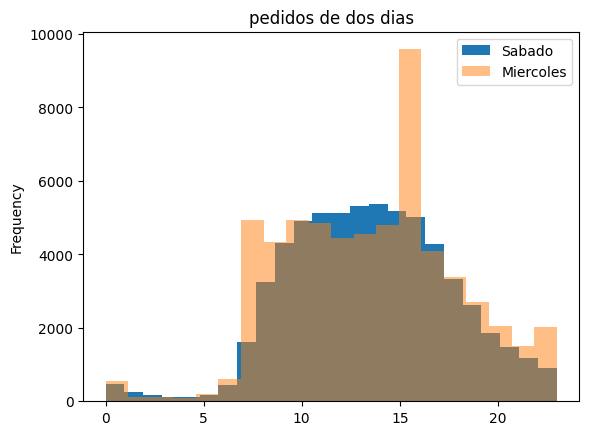

In [41]:
df_orders_sat["order_hour_of_day"].plot( # escribe tu código aquí
    kind="hist",
    bins=24,
    title="pedidos de dos dias",
    ylabel="Frequency"
)
    #alpha=0.7
df_orders_wend['order_hour_of_day'].plot( # escribe tu código aquí
    kind="hist",
    bins=20,
    alpha=0.5
)
plt.legend(["Sabado","Miercoles"])
plt.show()

Escribe aquí tus conclusiones

Existen dos diferencias significativas:
- El inicio y fin del dia miercoles es mas activo.
- Los miecoles a las 2 hay una fuerte alza de pedidos, probalemente esto sea lo que satura el sistema provocando duplicados.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

count    478952.000000
mean         17.157563
std          17.704457
min           1.000000
25%           5.000000
50%          11.000000
75%          23.000000
max         100.000000
Name: order_number, dtype: float64


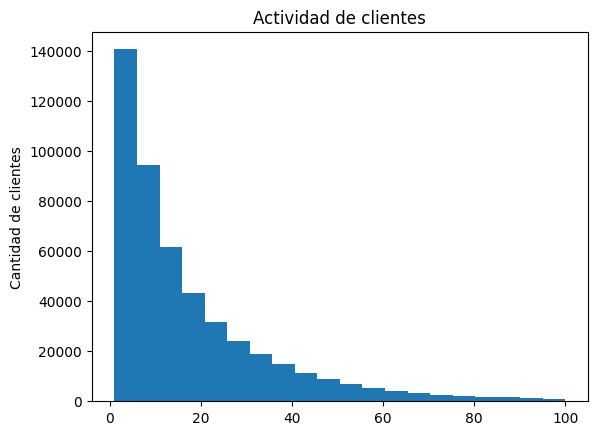

In [42]:

df_orders["order_number"].plot(
    kind="hist",
    bins=20,
    title="Actividad de clientes",
    ylabel="Cantidad de clientes"

)
print(df_orders["order_number"].describe())


Escribe aquí tus conclusiones

- La mayor parte de los clientes tiene pocos pedidos, la mediana es de 11.


### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [43]:
#print(df_order_products)

top_products_ids=df_order_products["product_id"].value_counts().head(20)
#print(top_products_ids)
#Filtramos los 20 valores mas comunes de la lista de productos ordenados



In [44]:
top_products_names=df_products[df_products["product_id"].isin(top_products_ids.index)][["product_id","product_name"]]
#print(top_products_names)

#Filtramos los nombres de los productos con base a si estan en los productos mas vendidos.


In [45]:
top_products=(top_products_ids.to_frame().merge(top_products_names,
                                               how="left",
                                               left_index=True,
                                               right_on="product_id"
                      )
             )[["product_id","product_name"]].reset_index(drop=True)
print(top_products)

#Juntamos el DF de los ids de los productos mas vendidos con el de los nombres usando "merge" y a través del product_id, en el
#en el primer DF es el indice pues asi lo genera "value_counts()" y en el segundo es la fila homonima.

    product_id              product_name
0        24852                    BANANA
1        13176    BAG OF ORGANIC BANANAS
2        21137      ORGANIC STRAWBERRIES
3        21903      ORGANIC BABY SPINACH
4        47209      ORGANIC HASS AVOCADO
5        47766           ORGANIC AVOCADO
6        47626               LARGE LEMON
7        16797              STRAWBERRIES
8        26209                     LIMES
9        27845        ORGANIC WHOLE MILK
10       27966       ORGANIC RASPBERRIES
11       22935      ORGANIC YELLOW ONION
12       24964            ORGANIC GARLIC
13       45007          ORGANIC ZUCCHINI
14       39275       ORGANIC BLUEBERRIES
15       49683            CUCUMBER KIRBY
16       28204        ORGANIC FUJI APPLE
17        5876             ORGANIC LEMON
18        8277  APPLE HONEYCRISP ORGANIC
19       40706    ORGANIC GRAPE TOMATOES


Escribe aquí tus conclusiones

- Una vez limpias las tablas es fácil obtener el top de productos. 
- Esta información es altamente importante para marketing.
- Siendo los más vendidos, vale la pena hacer ofertas para atraer clientes.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [46]:
amount_pro=df_order_products.groupby("order_id")["product_id"].count()
print(amount_pro)
amount_pro.describe()

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64


count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


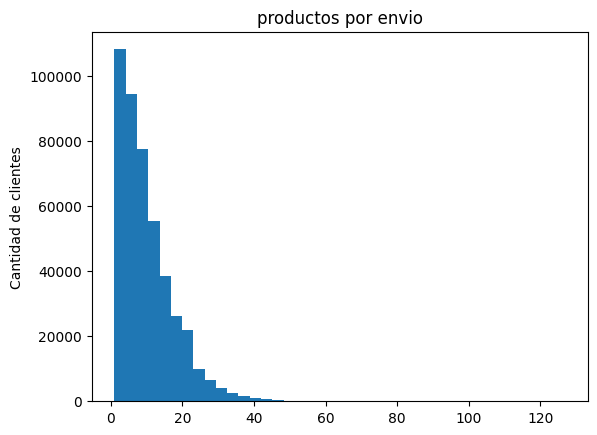

In [47]:
print(amount_pro.sort_values(ascending=True).describe())
(amount_pro.sort_values(ascending=True)).plot(
    kind="hist",
    bins=40,
    title="productos por envio",
    ylabel="Cantidad de clientes"

)
plt.show() 

Escribe aquí tus conclusiones
- La mayoria de los clientes piden ordenes de pocos items, 8 como mediana.
- Solo un 25% de los clientes piden mas de 14 items.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [48]:
top_reordered_products_ids=df_order_products[df_order_products["reordered"]==1]["product_id"].value_counts().head(20)
print(top_reordered_products_ids)
#Filtramos los 20 valores mas comunes de la lista de productos ordenados que han sido reordenados.

product_id
24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
47766    18743
27845    16251
47626    15044
27966    14748
16797    13945
26209    13327
22935    11145
24964    10411
45007    10076
49683     9538
28204     8989
8277      8836
39275     8799
5876      8412
49235     8389
Name: count, dtype: int64


In [49]:
top_reordered_products_names=df_products[df_products["product_id"].isin(
    top_reordered_products_ids.index)][["product_id","product_name"]]

print(top_reordered_products_names)

#Filtramos los nombres de los productos con base a si estan en los productos mas vendidos que han sido reordenados.

       product_id              product_name
5875         5876             ORGANIC LEMON
8276         8277  APPLE HONEYCRISP ORGANIC
13175       13176    BAG OF ORGANIC BANANAS
16796       16797              STRAWBERRIES
21136       21137      ORGANIC STRAWBERRIES
21902       21903      ORGANIC BABY SPINACH
22934       22935      ORGANIC YELLOW ONION
24851       24852                    BANANA
24963       24964            ORGANIC GARLIC
26208       26209                     LIMES
27844       27845        ORGANIC WHOLE MILK
27965       27966       ORGANIC RASPBERRIES
28203       28204        ORGANIC FUJI APPLE
39274       39275       ORGANIC BLUEBERRIES
45006       45007          ORGANIC ZUCCHINI
47208       47209      ORGANIC HASS AVOCADO
47625       47626               LARGE LEMON
47765       47766           ORGANIC AVOCADO
49234       49235       ORGANIC HALF & HALF
49682       49683            CUCUMBER KIRBY


In [50]:
top_reordered_products=(top_reordered_products_ids.to_frame().merge(top_reordered_products_names,
                                               how="left",
                                               left_index=True,
                                               right_on="product_id"
                      )
             )[["product_id","product_name"]].reset_index(drop=True)
print(top_reordered_products)

#Juntamos el DF de los ids de los productos mas vendidos que han sido re ordenados con el de los nombres usando "merge"
# a través del product_id, en el en el primer DF es el indice pues asi lo genera "value_counts()"
#y en el segundo es la fila homonima.

    product_id              product_name
0        24852                    BANANA
1        13176    BAG OF ORGANIC BANANAS
2        21137      ORGANIC STRAWBERRIES
3        21903      ORGANIC BABY SPINACH
4        47209      ORGANIC HASS AVOCADO
5        47766           ORGANIC AVOCADO
6        27845        ORGANIC WHOLE MILK
7        47626               LARGE LEMON
8        27966       ORGANIC RASPBERRIES
9        16797              STRAWBERRIES
10       26209                     LIMES
11       22935      ORGANIC YELLOW ONION
12       24964            ORGANIC GARLIC
13       45007          ORGANIC ZUCCHINI
14       49683            CUCUMBER KIRBY
15       28204        ORGANIC FUJI APPLE
16        8277  APPLE HONEYCRISP ORGANIC
17       39275       ORGANIC BLUEBERRIES
18        5876             ORGANIC LEMON
19       49235       ORGANIC HALF & HALF


Escribe aquí tus conclusiones

- Estos articulos son de los mas importantes, pues la gente vuelve a pedirlos frecuentemente

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [51]:
pro_total=df_order_products.groupby("product_id")["reordered"].count()
#print(".............\n",df_order_products.groupby("product_id")["reordered"].sum())
pro_reordered=df_order_products[df_order_products["reordered"]==1].groupby("product_id")["reordered"].count()
print(pro_total)
print(pro_reordered)

#Creamos dos series, una con la suma por producto que fue ordenado y otra con la suma de cuantas veces fue reordenado.


product_id
1        280
2         11
3         42
4         49
7          2
        ... 
49690      5
49691     72
49692     12
49693     25
49694      9
Name: reordered, Length: 45573, dtype: int64
product_id
1        158
3         31
4         25
7          1
8          6
        ... 
49690      4
49691     31
49692      5
49693     11
49694      3
Name: reordered, Length: 36228, dtype: int64


In [52]:
pro_ratio_redorder=(pro_reordered/pro_total).fillna(0)
print(pro_ratio_redorder)
#print(df_products)
#creamos un pandas series con la proporción de las veces que se pide y que se 
#vuelve a pedir cada producto con base a su product_id. Llenamos los datos nulos con ceros, estos datos
#aparecen por productos que no son reordenados.

product_id
1        0.564286
2        0.000000
3        0.738095
4        0.510204
7        0.500000
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Name: reordered, Length: 45573, dtype: float64


In [53]:
ratio_reordered_products=(df_products.merge(pro_ratio_redorder.to_frame(),
                                               how="left",
                                               right_index=True,
                                               left_on="product_id"
                      )
             )[["product_id","product_name","reordered"]].fillna(0)
print(ratio_reordered_products.head(20))

print(ratio_reordered_products["reordered"].describe())

#Combinamos la series con el las columnas relevantes del dataframe de productos
#y lo almacenamos en un nuevo dataframe por mostrar. llenamos los datos nulos con ceros, estos datos
#aparecen por productos que fueron pedidos.

    product_id                                       product_name  reordered
0            1                         CHOCOLATE SANDWICH COOKIES   0.564286
1            2                                   ALL-SEASONS SALT   0.000000
2            3               ROBUST GOLDEN UNSWEETENED OOLONG TEA   0.738095
3            4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...   0.510204
4            5                          GREEN CHILE ANYTIME SAUCE   0.000000
5            6                                       DRY NOSE OIL   0.000000
6            7                     PURE COCONUT WATER WITH ORANGE   0.500000
7            8                  CUT RUSSET POTATOES STEAM N' MASH   0.315789
8            9                  LIGHT STRAWBERRY BLUEBERRY YOGURT   0.761905
9           10     SPARKLING ORANGE JUICE & PRICKLY PEAR BEVERAGE   0.448071
10          11                                  PEACH MANGO JUICE   0.625000
11          12                         CHOCOLATE FUDGE LAYER CAKE   0.390244

Escribe aquí tus conclusiones
- Alrededor del 36% de los productos son productos que se piden de forma recurrente.
- esta información puede ser util para campañas de marketing.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Buen trabajo, la clave acá fue utilizar la columna reordered y hacer merge para obtener todos los datos. 
</div>


### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [54]:
#Necesito relacionar cada usuario con su respectivo pedido a traves de order_id

user_products=df_orders[["order_id","user_id"]].merge(df_order_products
                                                      [["order_id",
                                                        "product_id",
                                                        "reordered",
                                                        "add_to_cart_order"]],
                              on="order_id")
                              
print(user_products)
#Creamos un dataframe con la información relevante para hacer las proporciones.

         order_id  user_id  product_id  reordered  add_to_cart_order
0         1515936   183418       19048          1                1.0
1         1515936   183418       47766          1                3.0
2         1515936   183418       45066          0                9.0
3         1515936   183418       24082          0               11.0
4         1515936   183418       24363          0                4.0
...           ...      ...         ...        ...                ...
4545002   2071924     1730        1503          0               17.0
4545003   2071924     1730        4778          1               12.0
4545004   2071924     1730       11512          1                1.0
4545005   2071924     1730        4920          1                6.0
4545006   2071924     1730       17678          1                4.0

[4545007 rows x 5 columns]


count    149626.000000
mean          0.494853
std           0.292685
min           0.000000
25%           0.272727
50%           0.500000
75%           0.724138
max           1.000000
Name: reordered, dtype: float64


<Axes: >

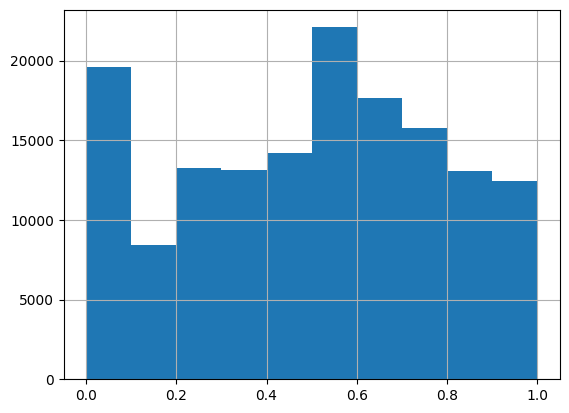

In [55]:
client_total=user_products.groupby("user_id")["reordered"].count()
client_reordered=user_products.groupby("user_id")["reordered"].sum()

#print(client_total)
#print(client_reordered)

client_ratio=client_reordered/client_total
print(client_ratio.describe())

client_ratio.hist()
#Creamos dos series, una con la suma por producto que fue ordenado y otra con la suma de cuantas veces fue reordenado.


In [56]:
(client_ratio.to_frame()).rename(
    columns={"reordered":"reorder_ratio"})


,reorder_ratio
user_id,
2,0.038462
4,0.000000
5,0.666667
6,0.000000
7,0.928571
...,...
206203,0.222222
206206,0.714286
206207,0.891304


Escribe aquí tus conclusiones

- Aproximadamente los clientes suelen llenar la mitad de su carrito con productos recurrentes.
 

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [57]:
#del daframe que relaciona cada usuario con su respectivo pedido a traves de order_id,
#debo extraer el top 20 de articulos mas comprados que sean numero uno en ser elegidos

#user_products[user_products["add_to_cart_order"]==1].groupby("user_id")["order_id"].count()
product_counts=(user_products.groupby("add_to_cart_order")["product_id"].value_counts()).to_frame().loc[1]
product_counts

,count
product_id,
24852,15562
13176,11026
27845,4363
21137,3946
47209,3390
...,...
10546,1
10566,1
10563,1


In [58]:
top_reordered=df_products[["product_id","product_name"]].merge(product_counts,
                                               how="right",
                                               right_index=True,
                                               left_on="product_id"
                               )[["product_id","product_name"]].fillna(0).reset_index(drop=True)
print(top_reordered.head(20))

    product_id                 product_name
0        24852                       BANANA
1        13176       BAG OF ORGANIC BANANAS
2        27845           ORGANIC WHOLE MILK
3        21137         ORGANIC STRAWBERRIES
4        47209         ORGANIC HASS AVOCADO
5        21903         ORGANIC BABY SPINACH
6        47766              ORGANIC AVOCADO
7        19660                 SPRING WATER
8        16797                 STRAWBERRIES
9        27966          ORGANIC RASPBERRIES
10       44632   SPARKLING WATER GRAPEFRUIT
11       49235          ORGANIC HALF & HALF
12       47626                  LARGE LEMON
13         196                         SODA
14       38689     ORGANIC REDUCED FAT MILK
15       26209                        LIMES
16       12341                HASS AVOCADOS
17        5785  ORGANIC REDUCED FAT 2% MILK
18       27086                  HALF & HALF
19       22935         ORGANIC YELLOW ONION


Escribe aquí tus conclusiones
- Las bananas son de los productos mas importantes del sitio
- Estos 20 elementos son prioritarios, pues son aquellos por los que la gente entra a hacer su compra.

### Conclusion general del proyecto:

 Hay multiples factores tecnicos y de marketing rescatables de este proyecto, iniciando con factores tecnicos:
 - Es necesario mejorar el sistema de adquision de datos para pedidos de mas de 64 elementos
 - Es necesario mejorar el proceso de pedidos en horas pico, por ejemplo los miercoles a las 2pm
 - Es importante estandarizar los nombres pasillos y departamentos
 - Seria conveniente estandarizar los nombre de productos.
 - Se debe inventariar, eliminar y tratar los productos faltantes.
 - Se debe automatizar que los primeros pedidos no generen un dato nulo en la entrada "days_since_prior_order".
 
 En cuanto aspectos de marketing:
 - La maxima cantidad de pedidos al dia ocurre alrededor de dos horas, las 10am  y 3pm.
 - Hay mas pedidos los domingos y lunes.
 - Se puede considerar un cliente recurrente tras los 11 pedidos, pues esta sobre el 50% de usuarios y uno fiel tras los 23, arriba del 75% de usuarios.
- El top 20 de productos (top_products), puede ser una gran herramienta para atraer clientes con ofertas.
- La media de items por pedido es de 8, se puede hacer ofertas si se alcanza dicho numero.
- Los articulos reordenados mas pedidos (top_reordered_products) pueden crear sustento a una base de usuarios.
- Hay que revisar la calidad de los articulos que los clientes no vuelven a pedir. (ratio_reordered_products)
- Hay que hacer enfasis en los principales artículos que las personas ponen primero en sus carritos, son una oportunidad de marketing.

 